# The Deep Learning Homework 3 - Question No. 11 Part 
Bahar Mahdavi - SN: 40152521337

## A. Apply the following filters with the opencv-python library in the image below.

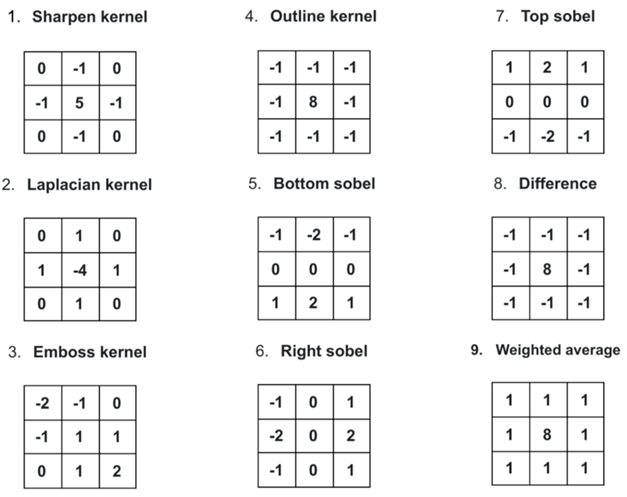

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Loading image

In [2]:
img1 = cv2.imread(r'C:\Bahar\M.Sc Data Mining\2. Deep Learning (Feb 2023-Jun 2023)\Homework_3\Final\pic1.JPG')

### Remove noise

In [3]:
pic1 = cv2.GaussianBlur(img1,(3,3),0)

### Convolute with proper kernels edge detection

In [4]:
# 1. Sharpen kernel
Sharpen_Kernel = np.array([[0,-1,0],
                          [-1,5,-1],
                          [0,-1,0]])/9

In [5]:
# 2. Laplacian kernel
Laplacian_Kernel = np.array([[0,1,0],
                            [1,-4,1],
                            [0,1,0]])

In [6]:
# 3. Emboss kernel
Emboss_Kernel = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])

In [7]:
# 4. Outline kernel
Outline_Kernel = np.array([[-1,-1,-1],
                          [-1,8,-1],
                          [-1,-1,-1]])

In [8]:
# 5. Bottom sobel
Bottom_Sobel = np.array([[-1,-2,-1],
                          [0,0,0],
                          [1,2,1]])

In [9]:
# 6. Right sobel
Right_Sobel = np.array([[-1,0,1],
                        [-2,0,2],
                        [-1,0,1]])

In [10]:
# 7. Top sobel
Top_Sobel = np.array([[1,2,1],
                      [0,0,0],
                      [-1,-2,-1]])

In [11]:
# 8. Difference
Difference = np.array([[-1,-1,-1],
                        [-1,8,-1],
                        [-1,-1,-1]])

In [12]:
# 9. Weighted average
Weighted_Average = np.array([[1,1,1],
                        [1,8,1],
                        [1,1,1]])/16

### Drowing plots

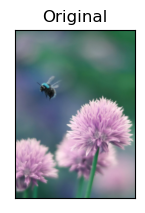

In [13]:
plt.subplot(2,1,1),plt.imshow(pic1,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.show()

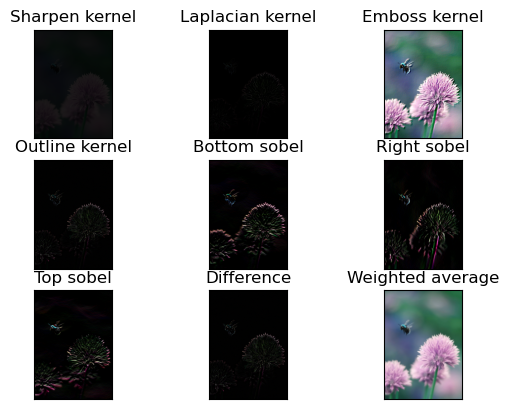

In [14]:
filters=[Sharpen_Kernel,Laplacian_Kernel,Emboss_Kernel,Outline_Kernel,Bottom_Sobel,
      Right_Sobel,Top_Sobel,Difference,Weighted_Average]
titles=['Sharpen kernel','Laplacian kernel','Emboss kernel','Outline kernel','Bottom sobel',
      'Right sobel','Top sobel','Difference','Weighted average']
images=[]

for i in range(9):
    dst = cv2.filter2D(pic1,-1,filters[i])
    images.append(dst)
    plt.subplot(3,3,i+1),plt.imshow(dst,cmap = 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

### Converting to gray scale

In [15]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

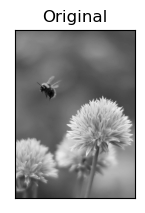

In [16]:
plt.subplot(2,1,1),plt.imshow(gray1,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.show()

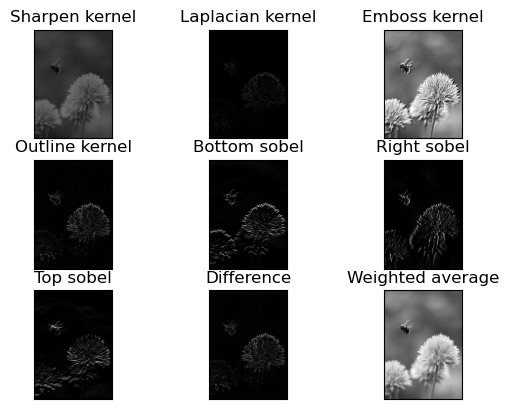

In [17]:
filters=[Sharpen_Kernel,Laplacian_Kernel,Emboss_Kernel,Outline_Kernel,Bottom_Sobel,
      Right_Sobel,Top_Sobel,Difference,Weighted_Average]
titles=['Sharpen kernel','Laplacian kernel','Emboss kernel','Outline kernel','Bottom sobel',
      'Right sobel','Top sobel','Difference','Weighted average']
images=[]

for i in range(9):
    dst = cv2.filter2D(gray1,-1,filters[i])
    images.append(dst)
    plt.subplot(3,3,i+1),plt.imshow(dst,cmap = 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

## B. Consider the attached Pic2 image as a mask and with the help of "opencv-python" match the pattern with the Pic1 image in the following ways and see the results:

1. Cross-Correlation
2. Normalized Cross-Correlation
3. Correlation Coefficient
4. Normalized Correlation Coefficient
5. Square Difference
6. Normalized Square

### Loading image

In [2]:
img1 = cv2.imread(r'C:\Bahar\M.Sc Data Mining\2. Deep Learning (Feb 2023-Jun 2023)\Homework_3\Final\pic1.JPG', cv2.IMREAD_GRAYSCALE)

In [3]:
img2 = cv2.imread(r'C:\Bahar\M.Sc Data Mining\2. Deep Learning (Feb 2023-Jun 2023)\Homework_3\Final\pic2.JPG', cv2.IMREAD_GRAYSCALE)

###  Remove noise 

In [3]:
pic1 = cv2.GaussianBlur(img1,(3,3),0)

In [5]:
pic2 = cv2.GaussianBlur(img2,(3,3),0)

### Drowing plots with different ways  

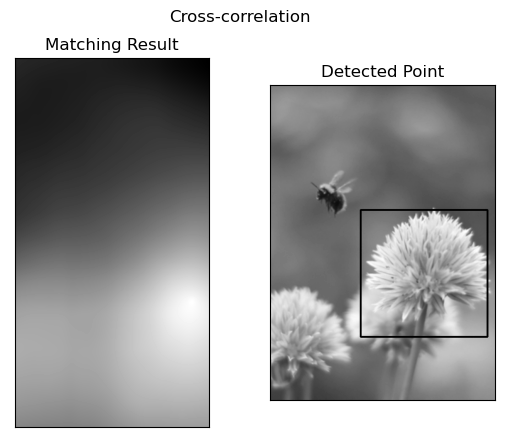

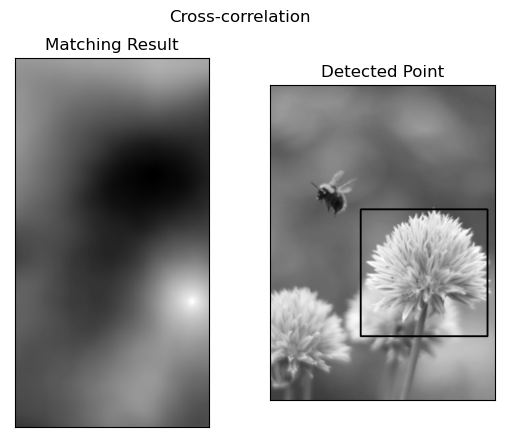

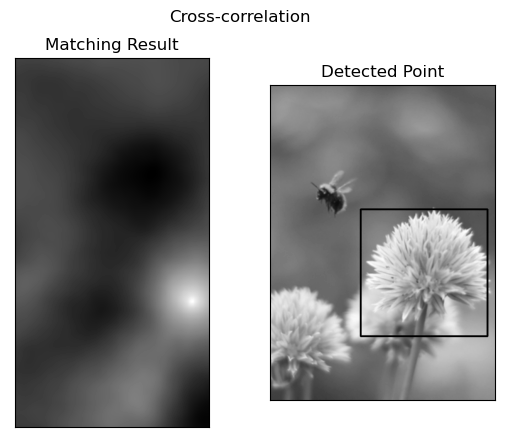

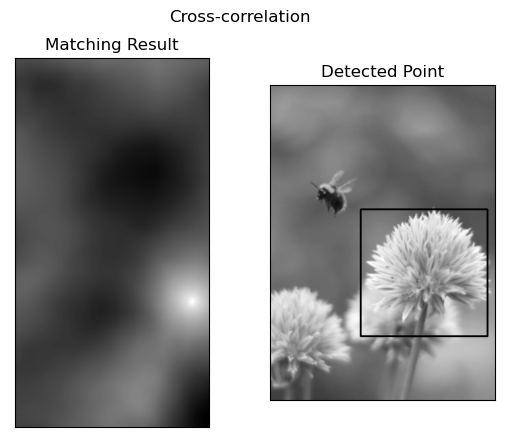

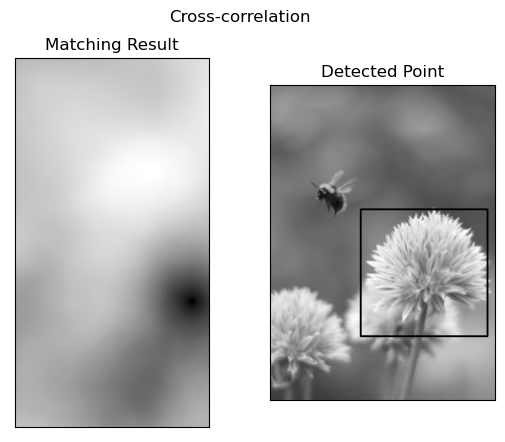

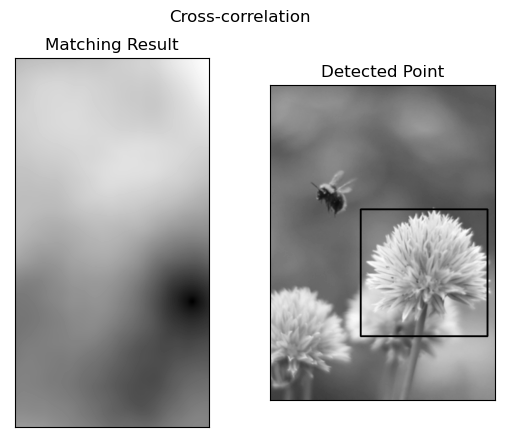

In [6]:
pic3 = pic1.copy()
w, h = pic2.shape[::-1]

titles = ['Cross-correlation',
          ' Normalized cross-correlation',
          'Correlation coefficient', 
          'Normalized correlation coefficient',
          'Square difference', 
          'Normalized square difference']


methods = ['cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED',
           'cv2.TM_CCOEFF',
           'cv2.TM_CCOEFF_NORMED',
           'cv2.TM_SQDIFF',
           'cv2.TM_SQDIFF_NORMED']

i = 0
for meth in methods:
    pic1 = pic3.copy()
    method = eval(meth) 
   
    res = cv2.matchTemplate(pic1,pic2,method)  # Apply template Matching
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]: # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(pic1,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(pic1, cmap='gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(titles[i])
    plt.show()

## C. Check how a one-dimensional derivative convolutional filter [-1 ;2; -1] should be written for two-dimensional matrix space. 

In [7]:
filter_1D = np.array([-1,2,-1])
kernel_1D = np.expand_dims(filter_1D, axis=0)
print(kernel_1D)

[[-1  2 -1]]


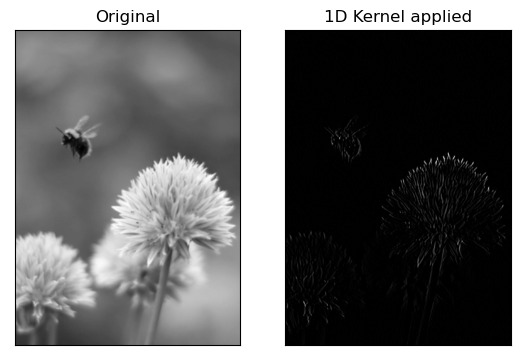

In [10]:
dst = cv2.filter2D(src = pic1, ddepth = -1, kernel = kernel_1D)

plt.subplot(121),plt.imshow(pic1, cmap = 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst, cmap = 'gray'),plt.title('1D Kernel applied')
plt.xticks([]), plt.yticks([])
plt.show()

## D. How the Canny and bilateral filters work and apply these two filters to the corresponding image, similar to part A. 

### 1. Canny Filter:
The Canny filter is a multi-stage edge detection algorithm. 

In [4]:
edges = cv2.Canny(pic1, threshold1=100, threshold2=200) #lower and upper thresholds for double thresholding

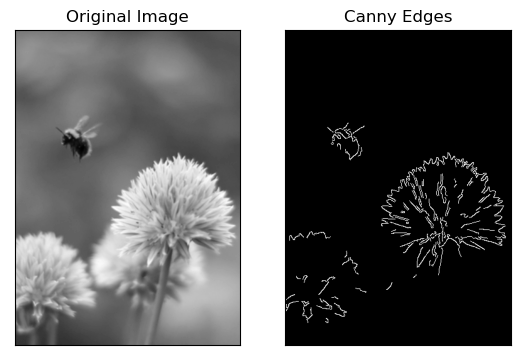

In [5]:
plt.subplot(121),plt.imshow(pic1, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges, cmap = 'gray')
plt.title('Canny Edges'), plt.xticks([]), plt.yticks([])
plt.show()

### 2. Bilateral Filter:
The bilateral filter is a non-linear, edge-preserving filter that effectively reduces noise while preserving important edges in an image. 

In [6]:
filtered_image = cv2.bilateralFilter(pic1, d=9, sigmaColor=75, sigmaSpace=75) # sigmaColor and sigmaSpace control the filter's intensity and spatial standard deviations

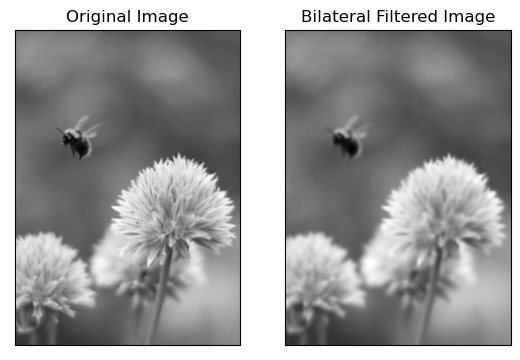

In [12]:
plt.subplot(121),plt.imshow(pic1, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(filtered_image, cmap = 'gray'),
plt.title('Bilateral Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()